<a href="https://colab.research.google.com/github/santluan/tcc-mba-usp/blob/main/first_steps_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primeiros Passos - Análise de Sentimentos com Naive Bayes

## Carregando pacotes

In [ ]:
# !pip install spacy
# !python -m spacy download en_core_web_sm

# Tratamento e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Processamento de linguagem natural/texto
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer
from nltk.stem import PorterStemmer
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Algoritmos de Machine Learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Leitura e análise de dados

In [ ]:
# Lendo o conjunto de dados
data = pd.read_csv('/content/drive/MyDrive/TCC_MBA/financial_sentences.csv')
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [ ]:
data['Sentiment'].value_counts()

,count
Sentiment,
neutral,3130
positive,1852
negative,860


## Aplicação do Modelo Naive Bayes sem transformação e limpeza dos dados

In [ ]:
# Semente aleatório apara reprodutibilidade
np.random.seed(7542)

In [ ]:
x = data['Sentence']
y = data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Confusion matrix, without normalization
[[ 55  75  45]
 [ 50 533  39]
 [ 16 113 243]]
Normalized confusion matrix
[[0.31428571 0.42857143 0.25714286]
 [0.08038585 0.85691318 0.06270096]
 [0.04301075 0.30376344 0.65322581]]


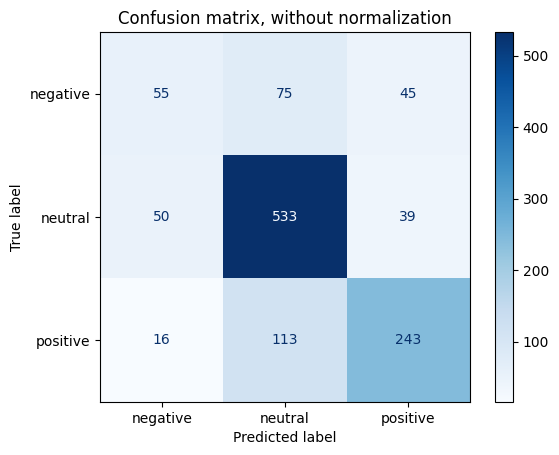

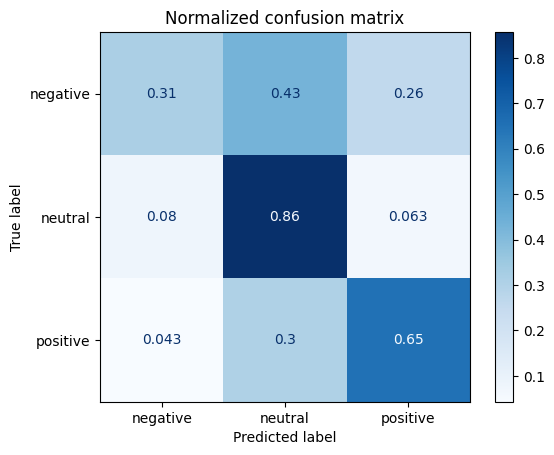

In [ ]:
# Fonte: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=['negative', 'neutral', 'positive'],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
# Accuracy: (Correct / Total)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:2.2%}")

# Precision
prec = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {prec:2.2%}")

# Recall
rec = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {rec:2.2%}")

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:2.2%}")

Accuracy: 71.09%
Precision: 69.79%
Recall: 71.09%
F1 Score: 69.92%


# Pré-processamento dos dados

Aplicar as etapas de pré-processamento aos dados para melhoria do modelo  
1- Lowercasing  
2- Remoção de pontuação  
3- Tokenização  
4- Remoção de stopwords  
5- Stemming  
6- Lemmatization  

In [ ]:
# Lowercasing

data['Sentence_clear'] = data['Sentence'].str.lower()
data.head()

,Sentence,Sentiment,Sentence_clear
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,"$esi on lows, down $1.50 to $2.50 bk a real po..."
2,"For the last quarter of 2010 , Componenta 's n...",positive,"for the last quarter of 2010 , componenta 's n..."
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnish-russian chamber of co...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...


In [ ]:
# Remoção de pontuação

import string

data['Sentence_clear'] = data['Sentence_clear'].str.translate(str.maketrans('', '', string.punctuation))

data.head()

,Sentence,Sentiment,Sentence_clear
0,The GeoSolutions technology will leverage Bene...,positive,the geosolutions technology will leverage bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi on lows down 150 to 250 bk a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,for the last quarter of 2010 componenta s net...
3,According to the Finnish-Russian Chamber of Co...,neutral,according to the finnishrussian chamber of com...
4,The Swedish buyout firm has sold its remaining...,neutral,the swedish buyout firm has sold its remaining...


In [ ]:
# Remoção de stopwords

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer

tokenizer = ToktokTokenizer()
stopwords = set(stopwords.words('english'))

data['Sentence_clear'] = data['Sentence_clear'].apply(lambda x: ' '.join([word for word in tokenizer.tokenize(x) if word not in stopwords]))

data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Sentence,Sentiment,Sentence_clear
0,The GeoSolutions technology will leverage Bene...,positive,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi lows 150 250 bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter 2010 componenta net sales doubled...
3,According to the Finnish-Russian Chamber of Co...,neutral,according finnishrussian chamber commerce majo...
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remaining 224 percent...


In [ ]:
# Stemming

# ps = PorterStemmer()

# data['Sentence_clear'] = data['Sentence_clear'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))

# data.head()

In [ ]:
# Lemmatization

lemma_docs = nlp.pipe(data['Sentence_clear'].astype(str))

data['Sentence_clear'] = [' '.join([token.lemma_ for token in doc]) for doc in lemma_docs]

data.head()

,Sentence,Sentiment,Sentence_clear
0,The GeoSolutions technology will leverage Bene...,positive,geosolution technology leverage benefon gps so...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi low 150 250 bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter 2010 componenta net sale double e...
3,According to the Finnish-Russian Chamber of Co...,neutral,accord finnishrussian chamber commerce major c...
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sell remain 224 percent st...


# Aplicando Modelo Naive Bayes

In [ ]:
x = data['Sentence_clear']
y = data['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Confusion matrix, without normalization
[[ 58  72  45]
 [ 60 514  48]
 [ 27 103 242]]
Normalized confusion matrix
[[0.33142857 0.41142857 0.25714286]
 [0.09646302 0.82636656 0.07717042]
 [0.07258065 0.27688172 0.65053763]]


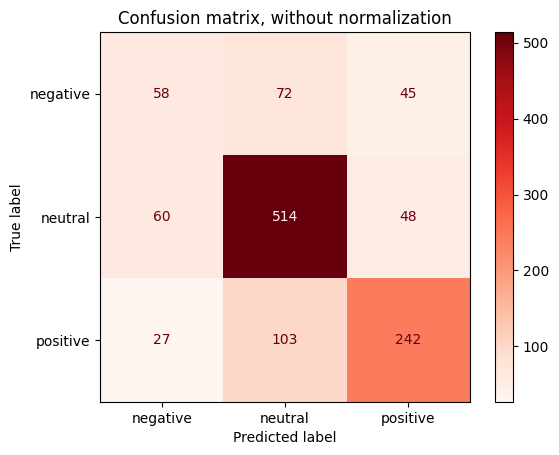

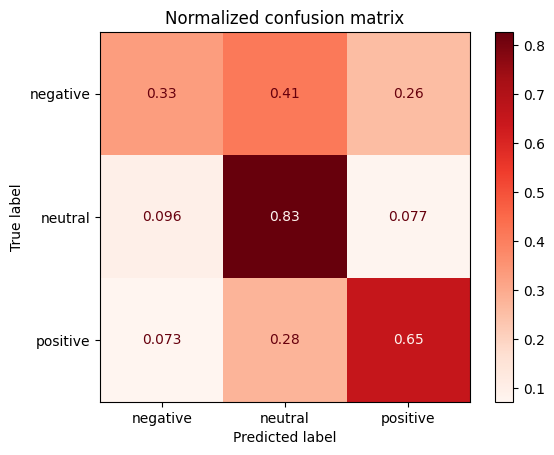

In [ ]:
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=['negative', 'neutral', 'positive'],
        cmap=plt.cm.Reds,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
# Accuracy: (Correct / Total)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:2.2%}")

# Precision
prec = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {prec:2.2%}")

# Recall
rec = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {rec:2.2%}")

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:2.2%}")

Accuracy: 69.63%
Precision: 68.67%
Recall: 69.63%
F1 Score: 68.93%


## Análise

Os indicadores Accuracy e F1-Score caíram após o processamento de texto, demonstrando que o modelo Naive Bayes se adapta melhor aos dados crús.   
Apesar de melhor, o modelo NB apresentou 70% de acurária, abrindo espaço para aumento de performance e utilização de métodos de fine-tunning para melhoria do algoritmo.